### Oraganization: GRIP The Sparks Foundation
### Name: Harshit Mathur
### Designation: Data Science and Business Analytics INTERN  
### #GRIPMAY21
### Task 2: Prediction using Unsupervised ML
## About Task :
### From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.

In [81]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans


In [82]:
# Importing "Iris" dataset
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
# Getting Number of Rows and Columns
dataset.shape

(150, 6)

In [84]:
# Checking for any NULL values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [85]:
# Overview of dataset scheme
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
# Statistical overview of dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
# Information about all distinct species in dataset
print("Distinct Species: ", dataset['Species'].unique())

Distinct Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Visualizing the data

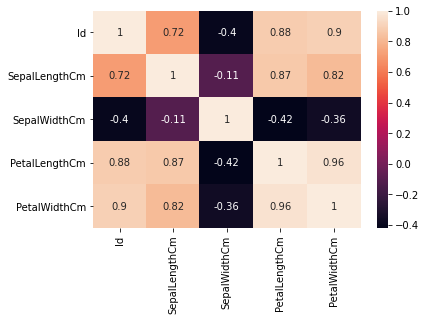

In [88]:
# checking correlation of data
core = dataset.corr()
sns.heatmap(core,annot=True)

#### The below "Box Plot" graphs will show the comparision between:
##### 1. Petal Length and Sepal Length
##### 2. Petal Width and Sepal Width
#### On the basis of different species

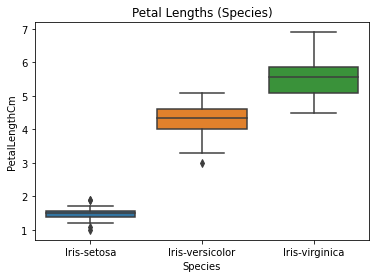

In [89]:
# Petal Length
sns.boxplot(y='PetalLengthCm' ,x='Species' ,data=dataset)
plt.title('Petal Lengths (Species)')
plt.show()

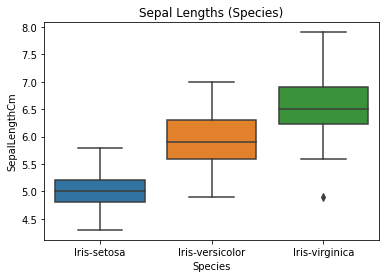

In [90]:
# Sepal Length
sns.boxplot(y='SepalLengthCm' ,x='Species' ,data=dataset)
plt.title('Sepal Lengths (Species)')
plt.show()

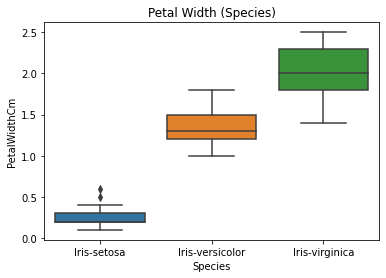

In [91]:
# Petal Width
sns.boxplot(y='PetalWidthCm' ,x='Species' ,data=dataset)
plt.title('Petal Width (Species)')
plt.show()

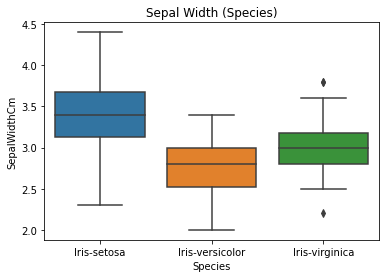

In [92]:
# Sepal Width
sns.boxplot(y='SepalWidthCm' ,x='Species' ,data=dataset)
plt.title('Sepal Width (Species)')
plt.show()

#### K- Means Clustring

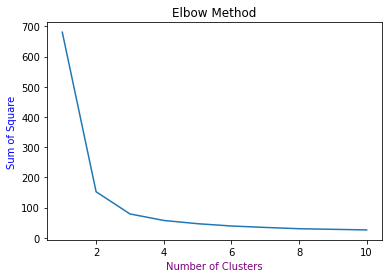

In [93]:
x = dataset.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
temp = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    temp.append(kmeans.inertia_)


# Plotting the results onto a line graph, 
# 'allowing us to observe 'The elbow'
plt.plot(range(1, 11), temp)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters',color= "Purple")
plt.ylabel('Sum of Square', color="Blue") # Within cluster sum of squares
plt.show()

In [94]:
x1 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = x1.fit_predict(x)
y

array([1, 8, 8, 8, 1, 7, 8, 1, 8, 8, 7, 1, 8, 8, 7, 7, 7, 1, 7, 1, 1, 1,
       8, 1, 1, 8, 1, 1, 1, 8, 8, 1, 7, 7, 8, 8, 1, 8, 8, 1, 1, 8, 8, 1,
       1, 8, 1, 8, 1, 1, 6, 6, 6, 2, 6, 4, 6, 9, 6, 2, 9, 4, 2, 6, 2, 6,
       4, 2, 6, 2, 3, 2, 3, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 3, 4, 6, 6, 6,
       4, 2, 4, 6, 2, 9, 4, 4, 4, 6, 9, 4, 5, 3, 0, 5, 5, 0, 4, 0, 5, 0,
       5, 3, 5, 3, 3, 5, 5, 0, 0, 3, 5, 3, 0, 3, 5, 0, 3, 3, 5, 0, 0, 0,
       5, 3, 3, 0, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3], dtype=int32)

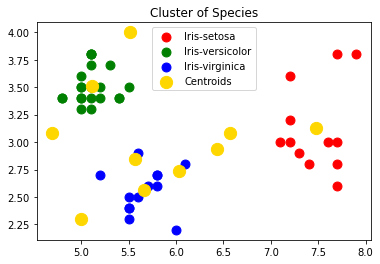

In [95]:
#using scatter plot to see clusters and centroids 

plt.scatter(x[y == 0,0], x[y == 0,1], s = 80,c = 'red',label = 'Iris-setosa')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 80,c = 'green',label = 'Iris-versicolor')
plt.scatter(x[y == 2,0], x[y == 2,1], s = 80,c = 'blue',label = 'Iris-virginica')
plt.scatter(x1.cluster_centers_[:,0], x1.cluster_centers_[:,1],s = 150, c = 'gold',label = 'Centroids')
plt.legend()
plt.title("Cluster of Species")
plt.show()

In [96]:
kModel = kmeans.fit(x)
kModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [97]:
kModel.labels_

array([1, 8, 8, 8, 1, 7, 8, 1, 8, 8, 7, 1, 8, 8, 7, 7, 7, 1, 7, 1, 1, 1,
       8, 1, 1, 8, 1, 1, 1, 8, 8, 1, 7, 7, 8, 8, 1, 8, 8, 1, 1, 8, 8, 1,
       1, 8, 1, 8, 1, 1, 6, 6, 6, 2, 6, 4, 6, 9, 6, 2, 9, 4, 2, 6, 2, 6,
       4, 2, 6, 2, 3, 2, 3, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 3, 4, 6, 6, 6,
       4, 2, 4, 6, 2, 9, 4, 4, 4, 6, 9, 4, 5, 3, 0, 5, 5, 0, 4, 0, 5, 0,
       5, 3, 5, 3, 3, 5, 5, 0, 0, 3, 5, 3, 0, 3, 5, 0, 3, 3, 5, 0, 0, 0,
       5, 3, 3, 0, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3], dtype=int32)

In [98]:
kModel.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.10909091, 3.50909091, 1.53181818, 0.28181818],
       [5.66153846, 2.56153846, 3.87692308, 1.16923077],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.57272727, 2.84545455, 4.30909091, 1.37272727],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.        , 2.3       , 3.275     , 1.025     ]])

### Thank You